In [12]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


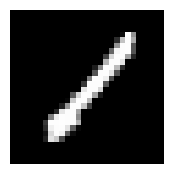

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[535],cmap="gray")
plt.axis("off")
plt.show()

In [4]:
n_class = len(set(y_train))
print("Total different Type of Classes : ",n_class)
print("And Classes are : ",set(y_train))

Total different Type of Classes :  10
And Classes are :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
print("No of Sample for each digit : ")
for i in range(n_class):
  print(i,":",len(x_train[y_train==i]))

No of Sample for each digit : 
0 : 5923
1 : 6742
2 : 5958
3 : 6131
4 : 5842
5 : 5421
6 : 5918
7 : 6265
8 : 5851
9 : 5949


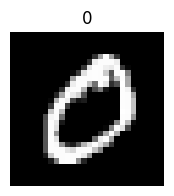

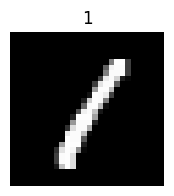

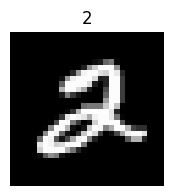

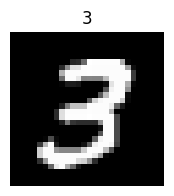

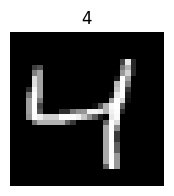

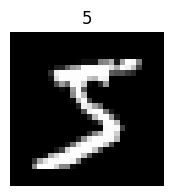

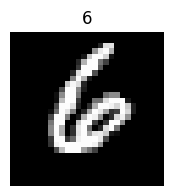

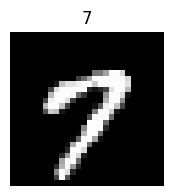

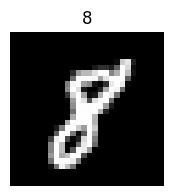

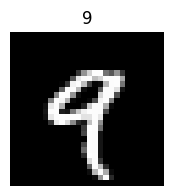

In [ ]:
for i in range(n_class):
  plt.figure(figsize=(2,2))
  plt.imshow(x_train[y_train==i][0],cmap="gray")
  plt.title(i)
  plt.axis("off")
  plt.show()

In [5]:
n_pixel = x_train.shape[1]*x_train.shape[2]

In [6]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
y_train = to_categorical(y_train,n_class)
y_test = to_categorical(y_test,n_class)

In [9]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [17]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))

#output layer
model.add(Dense(n_class,activation="softmax"))
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
model.fit(x_train,y_train,verbose=1,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.1877 - accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0656 - accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0547 - accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0467 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0470 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0375 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0362 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0275 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.03

In [53]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving eight.jpg to eight.jpg
User uploaded file "eight.jpg" with length 9880 bytes


In [20]:
import cv2
import numpy as np

In [54]:
digit = cv2.imread("eight.jpg")

In [32]:
def Predictor(digit):
  digit_a = digit
  digit = cv2.cvtColor(digit,cv2.COLOR_BGR2GRAY)
  digit = cv2.resize(digit,(28,28))
  digit = digit.reshape(1,28,28,1)
  op = np.argmax(model.predict(digit))
  plt.figure(figsize=(2,2))
  plt.imshow(digit_a)
  plt.title(f"Predicted value :{op}")
  plt.axis("off")
  plt.show()  

1/1 [==============================] - 0s 26ms/step


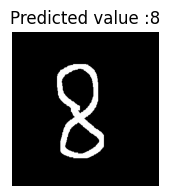

In [55]:
Predictor(digit)